# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | dalbandin
Processing Record 6 of Set 1 | taksimo
Processing Record 7 of Set 1 | mamadysh
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | yoloten
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | kataragama
City not found. Skipping...
Processing Record 15 of Set 1 | cooma
Processing Record 16 of Set 1 | nikolayevsk-on-amure
Processing Record 17 of Set 1 | armacao de buzios
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | massawa
Processing Record 21 o

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,294.21,61,6,9.08,ZA,1700667919
1,grytviken,-54.2811,-36.5092,274.60,100,100,2.58,GS,1700667920
2,ilulissat,69.2167,-51.1000,268.16,68,75,7.20,GL,1700667921
3,edinburgh of the seven seas,-37.0676,-12.3116,287.02,79,54,9.23,SH,1700667921
4,dalbandin,28.8947,64.4101,295.36,40,2,4.00,PK,1700667922


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,294.21,61,6,9.08,ZA,1700667919
1,grytviken,-54.2811,-36.5092,274.60,100,100,2.58,GS,1700667920
2,ilulissat,69.2167,-51.1000,268.16,68,75,7.20,GL,1700667921
3,edinburgh of the seven seas,-37.0676,-12.3116,287.02,79,54,9.23,SH,1700667921
4,dalbandin,28.8947,64.4101,295.36,40,2,4.00,PK,1700667922


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 577
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        578 non-null    object 
 1   Lat         578 non-null    float64
 2   Lng         578 non-null    float64
 3   Max Temp    578 non-null    float64
 4   Humidity    578 non-null    int64  
 5   Cloudiness  578 non-null    int64  
 6   Wind Speed  578 non-null    float64
 7   Country     574 non-null    object 
 8   Date        578 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 45.2+ KB


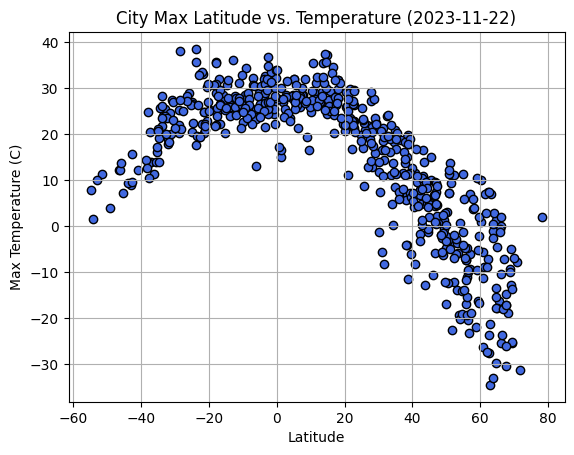

In [22]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp_c = city_data_df["Max Temp"] - 273.15
plt.scatter (lat, max_temp_c, marker = "o", facecolors = "royalblue", edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (C)")
plt.title ("City Max Latitude vs. Temperature (2023-11-22)")
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

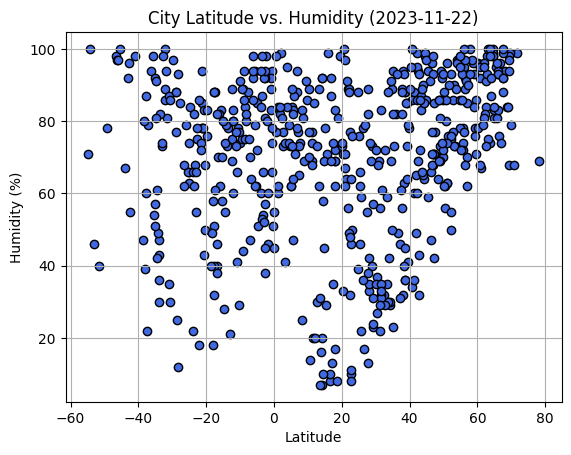

In [23]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter (lat,humidity, marker = "o", facecolors = "royalblue", edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")
plt.title ("City Latitude vs. Humidity (2023-11-22)")
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

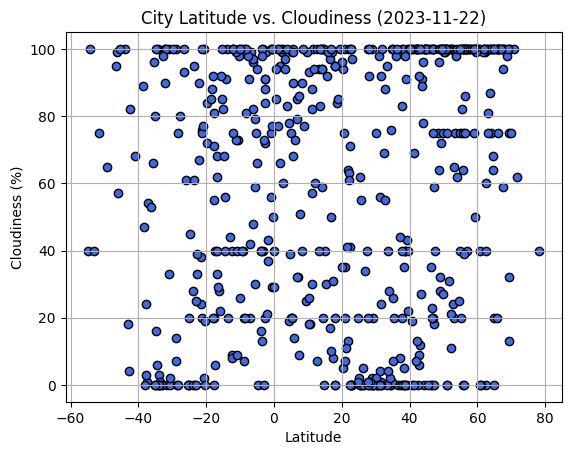

In [25]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter (lat,cloudiness, marker = "o", facecolors = "royalblue", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.title ("City Latitude vs. Cloudiness (2023-11-22)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

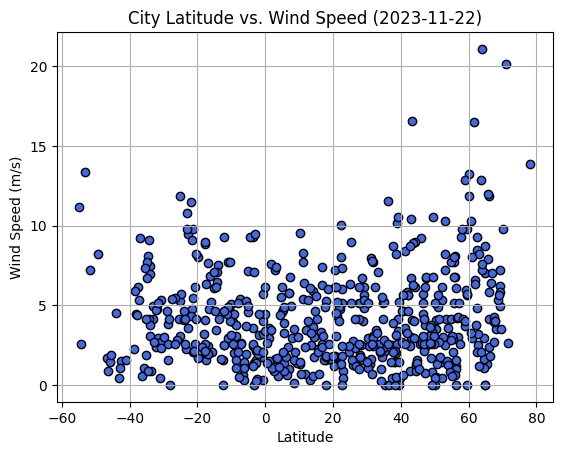

In [26]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter (lat,wind_speed, marker = "o", facecolors = "royalblue", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.title ("City Latitude vs. Wind Speed (2023-11-22)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def liner_regression(x,y):
    slope, int, r_value, p_value, stderr = linregress(x,y)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


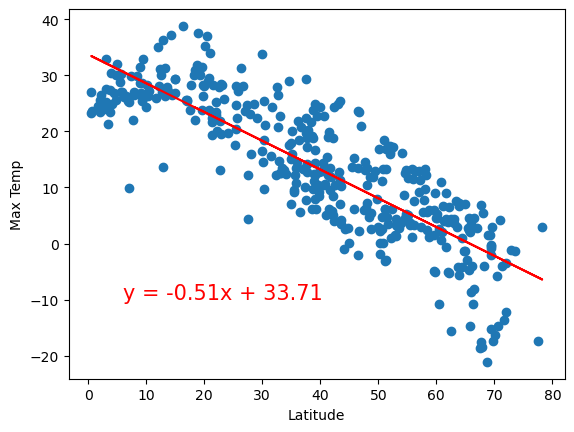

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


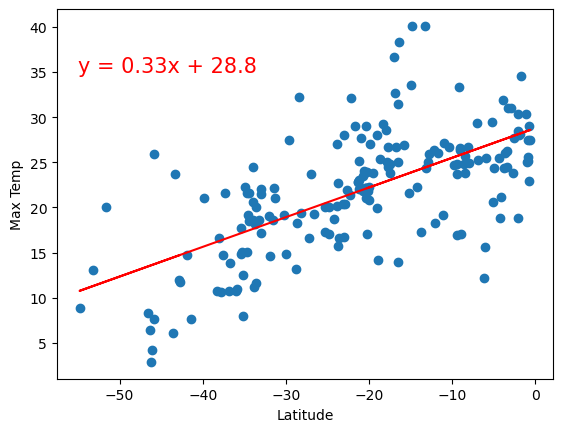

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


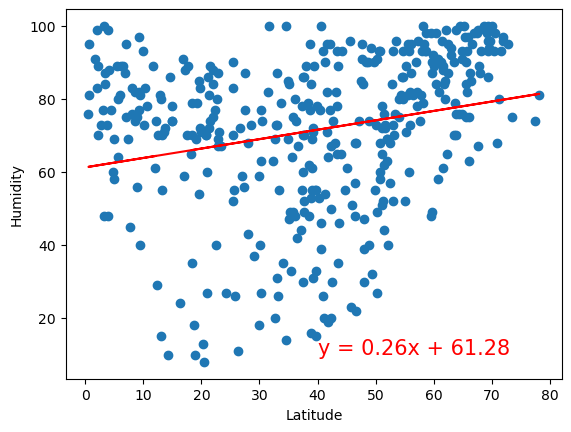

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


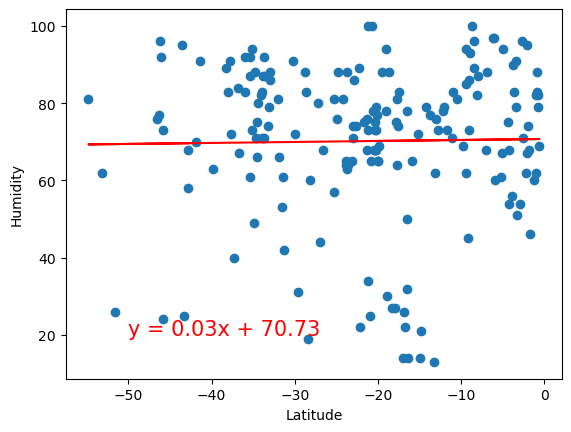

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


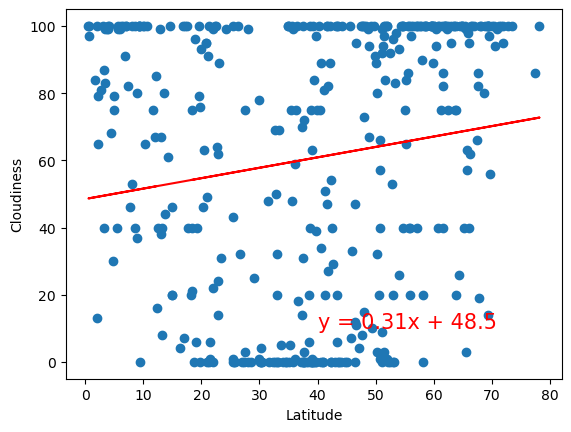

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


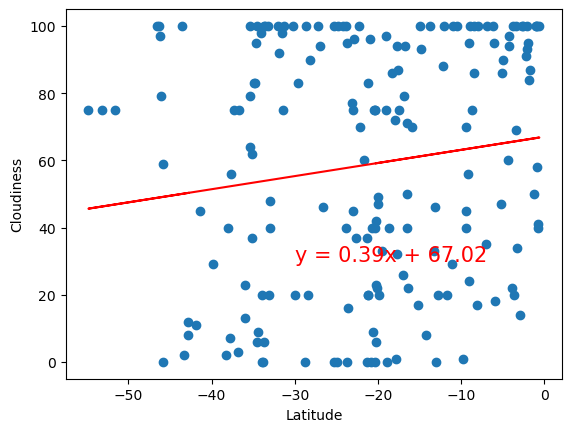

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


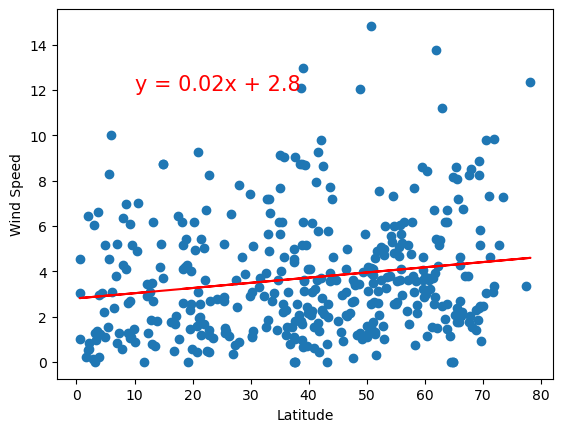

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


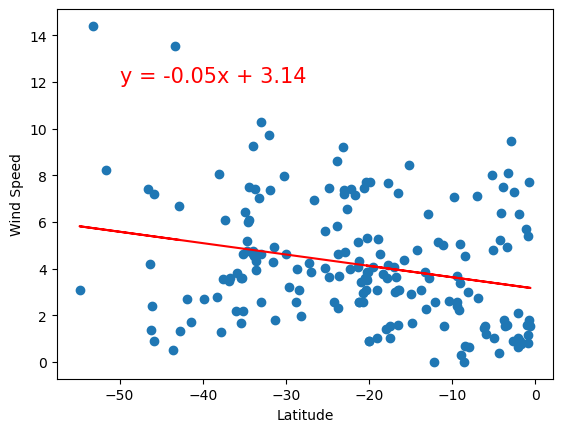

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE